In [2]:
import tensorflow as tf
# Check for GPU
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print(f"GPUs available: {len(physical_devices)}")
    for i, gpu in enumerate(physical_devices):
        print(f"  GPU {i}: {gpu}")
else:
    print("No GPU found. Training will use CPU.")

GPUs available: 1
  GPU 0: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [3]:


import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:


train_dir = r"C:\Users\shash\Desktop\sign\dataset"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

num_classes = len(train_generator.class_indices)
print("Total Classes:", num_classes)

# Load MobileNetV2 as base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
base_model.trainable = False  # Freeze base model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "best_asl_model_mobilenet.keras",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stop, checkpoint]
)


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.
Total Classes: 29
Total Classes: 29
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 100, 100, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormaliza

In [5]:
model.save("asl_model_final_mobilenet.keras")


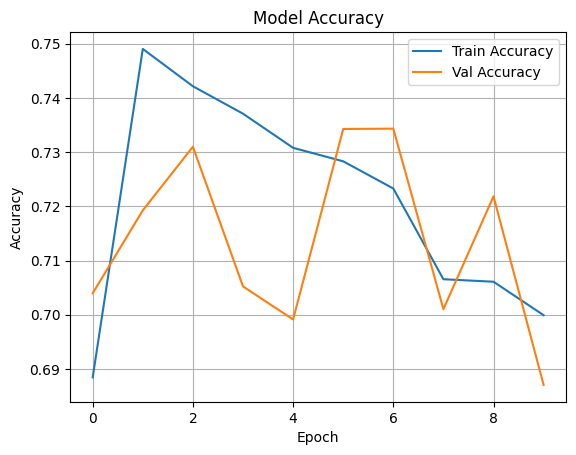

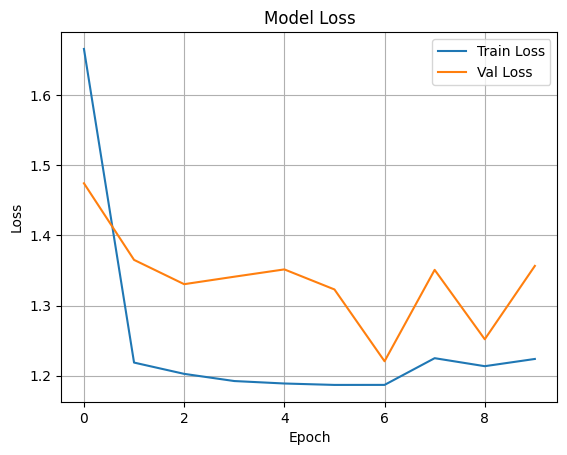

544/544 [==============================] - 98s 178ms/step
Classification Report:
              precision    recall  f1-score   support

           A       0.95      0.63      0.76       600
           B       0.87      0.68      0.76       600
           C       0.61      0.98      0.75       600
           D       0.81      0.87      0.84       600
           E       0.82      0.64      0.72       600
           F       0.92      0.96      0.94       600
           G       0.38      0.83      0.52       600
           H       0.65      0.92      0.76       600
           I       0.56      0.53      0.54       600
           J       0.65      0.58      0.61       600
           K       0.80      0.90      0.85       600
           L       0.93      0.80      0.86       600
           M       0.75      0.38      0.51       600
           N       0.59      0.93      0.72       600
           O       0.92      0.61      0.73       600
           P       0.77      0.57      0.66       600


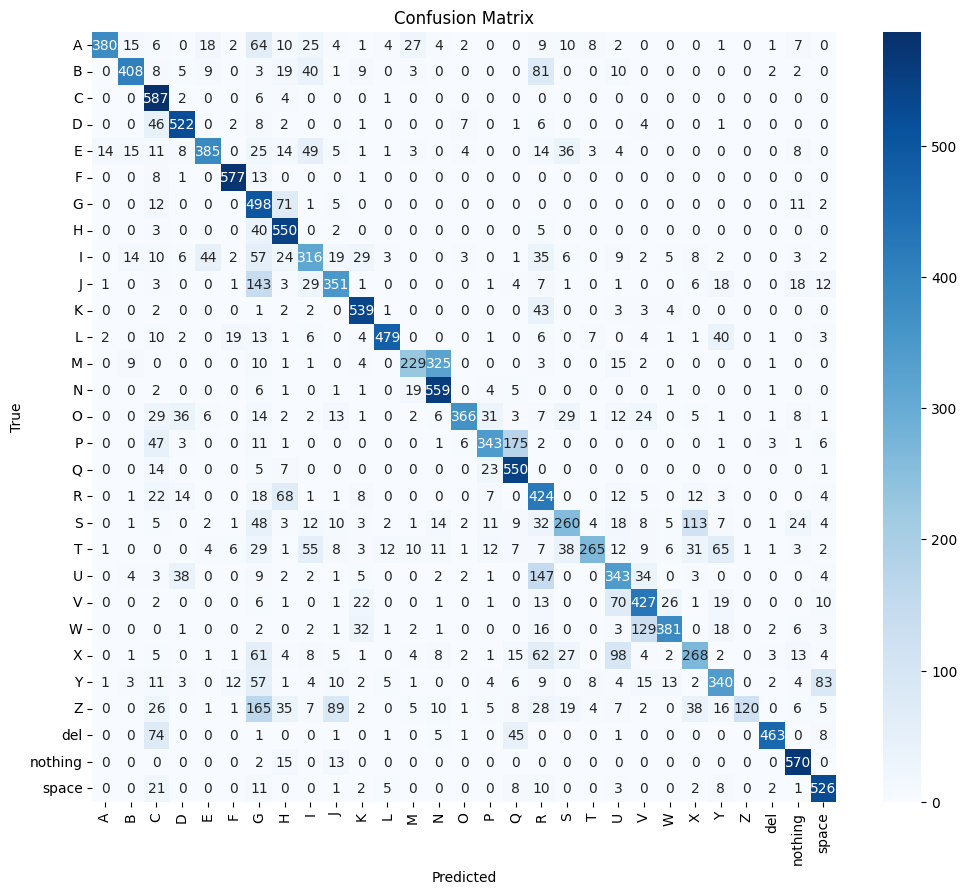

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Classification report and confusion matrix
y_true = val_generator.classes
y_pred_probs = model.predict(val_generator)
y_pred = np.argmax(y_pred_probs, axis=1)

# Sort class_labels by index for correct order
class_indices = val_generator.class_indices
sorted_class_items = sorted(class_indices.items(), key=lambda x: x[1])
class_labels = [item[0] for item in sorted_class_items]
labels = [item[1] for item in sorted_class_items]

print("Class labels (ordered):", class_labels)
print("Classification Report:")
print(classification_report(y_true, y_pred, labels=labels, target_names=class_labels, zero_division=0))

cm = confusion_matrix(y_true, y_pred, labels=labels)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [3]:
model = load_model("asl_model_final_mobilenet.keras")
print("Model loaded successfully!")

Model loaded successfully!
